In [41]:
import pandas as pd
import datetime
import numpy as np
from decimal import *
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('dark_background')

In [42]:
file = pd.read_csv("new.csv")

In [43]:
file.result_type

0       RefreshHit
1            Error
2            Error
3            Error
4       RefreshHit
           ...    
1451         Error
1452         Error
1453         Error
1454         Error
1455         Error
Name: result_type, Length: 1456, dtype: object

In [44]:
file.columns


Index(['date', 'time', 'location', 'bytes', 'request_ip', 'method', 'host',
       'uri', 'status', 'referrer', 'user_agent', 'query_string', 'cookie',
       'result_type', 'request_id', 'host_header', 'request_protocol',
       'request_bytes', 'time_taken', 'xforwarded_for', 'ssl_protocol',
       'ssl_cipher', 'response_result_type', 'http_version', 'fle_status',
       'fle_encrypted_fields', 'c_port', 'time_to_first_byte',
       'x_edge_detailed_result_type', 'sc_content_type', 'sc_content_len',
       'sc_range_start', 'sc_range_end'],
      dtype='object')

In [45]:
refined = file[["date","time","location","bytes","request_ip","uri","user_agent","request_id","result_type","method"]].dropna()

In [46]:
refined.index = pd.to_datetime(refined["date"] +" "+ refined["time"])

In [47]:
done = refined.drop(columns=["date","time"])

<Axes: >

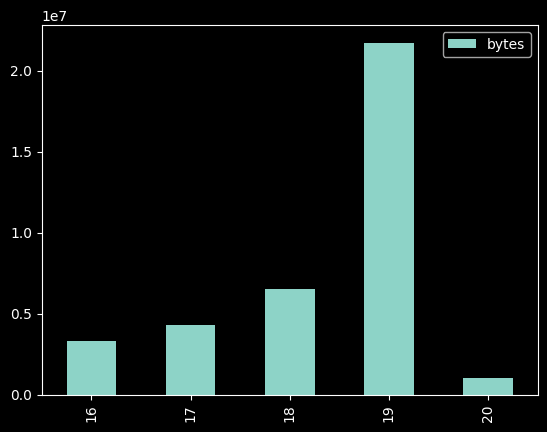

In [48]:
done.groupby(done.index.day).aggregate({"bytes":"sum"}).plot.bar()

In [55]:
correct = done.loc[(done.index >= "2023-03-19 00:00:00") & (done.index < "2023-03-19 14:00:00")]

In [56]:
correct.groupby("location").aggregate({"bytes":"sum"}).sort_values("bytes")

,bytes
location,
DFW57-P4,530.0
HKG60-C1,1301.0
NRT20-C4,1306.0
MRS52-P1,1334.0
DEN50-C1,1335.0
MUC50-P1,1337.0
FRA60-P3,1339.0
MIA3-P2,1896.0
AMS1-P1,2668.0


In [61]:
who_is = correct[correct["location"] == "IAD55-P4"].drop(columns=["request_id"])

In [72]:
who_is.groupby("request_ip").aggregate({"bytes":"sum"}).sort_values("bytes")

,bytes
request_ip,
205.169.39.104,359222.0
65.154.226.169,957789.0
65.154.226.166,957816.0
205.169.39.135,1317058.0
65.154.226.167,1795424.0
65.154.226.170,2873359.0


In [73]:
who_is[who_is["request_ip"]== "65.154.226.170"]

,location,bytes,request_ip,uri,user_agent,result_type,method
2023-03-19 10:58:30,IAD55-P4,1157.0,65.154.226.170,/,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:30,IAD55-P4,28313.0,65.154.226.170,/static/css/main.2ac3fd16.css,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:30,IAD55-P4,358100.0,65.154.226.170,/static/js/main.ea165172.js,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:31,IAD55-P4,146716.0,65.154.226.170,/4380747.jpg,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:31,IAD55-P4,280654.0,65.154.226.170,/6551283.jpg,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:31,IAD55-P4,142859.0,65.154.226.170,/5124556.jpg,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:40,IAD55-P4,1314.0,65.154.226.170,/,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:40,IAD55-P4,357908.0,65.154.226.170,/static/js/main.ea165172.js,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:40,IAD55-P4,146712.0,65.154.226.170,/4380747.jpg,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET
2023-03-19 10:58:40,IAD55-P4,28466.0,65.154.226.170,/static/css/main.2ac3fd16.css,Mozilla/5.0%20(X11;%20Linux%20x86_64)%20AppleW...,Hit,GET


In [39]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(who_is)

                     location     bytes      request_ip  \
2023-03-19 10:58:16  IAD55-P4   28499.0  65.154.226.166   
2023-03-19 10:58:17  IAD55-P4  280499.0  65.154.226.166   
2023-03-19 10:59:09  IAD55-P4    1151.0  205.169.39.135   
2023-03-19 10:59:09  IAD55-P4   28304.0  205.169.39.135   
2023-03-19 10:59:09  IAD55-P4  358119.0  205.169.39.135   
2023-03-19 10:59:10  IAD55-P4  146717.0  205.169.39.135   
2023-03-19 10:59:10  IAD55-P4  142858.0  205.169.39.135   
2023-03-19 10:59:10  IAD55-P4  280664.0  205.169.39.135   
2023-03-19 10:58:30  IAD55-P4    1157.0  65.154.226.170   
2023-03-19 10:58:30  IAD55-P4   28313.0  65.154.226.170   
2023-03-19 10:58:30  IAD55-P4  358100.0  65.154.226.170   
2023-03-19 10:58:31  IAD55-P4  146716.0  65.154.226.170   
2023-03-19 10:58:31  IAD55-P4  280654.0  65.154.226.170   
2023-03-19 10:58:31  IAD55-P4  142859.0  65.154.226.170   
2023-03-19 10:58:47  IAD55-P4    1314.0  205.169.39.135   
2023-03-19 10:58:47  IAD55-P4  357931.0  205.169.39.135 

In [77]:
bot_string = "(?i)curl|python|apache-http|go-http|webtech|-|insomnia|google|msnbot|wget|ioncrawl|java|xpanse|zoom|screaming|crawler"
without_bot = wut[wut['user_agent'].str.contains(bot_string) == False]